In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

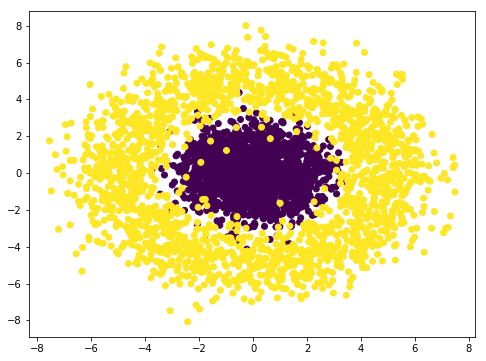

In [23]:
theta = np.linspace(0, 2*np.pi, 2000)

r1 = 1
r2 = 5

x11 = r1*np.cos(theta) + np.random.randn(2000)
x12 = r1*np.sin(theta) + np.random.randn(2000)
X1 = np.vstack((x11,x12)).T

x21 = r2*np.cos(theta) + np.random.randn(2000)
x22 = r2*np.sin(theta) + np.random.randn(2000)
X2 = np.vstack((x21,x22)).T

X = np.vstack((X1, X2))

y = np.array([0]*int(len(X)/2) + [1]*int(len(X)/2))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y)

In [24]:
# Data Prep

PHI = np.vstack((np.ones(len(X)), X[:,0]**2, X[:,1]**2)).T

In [25]:
# Functions

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y,p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

def accuracy(y,p):
    return np.mean(y == np.round(p))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


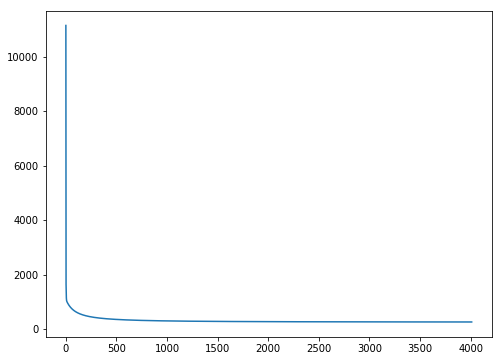

In [27]:
# Train the Model

w = np.random.randn(PHI.shape[1])

J = []
eta = 3e-5
epochs = int(1e4)

for t in range(epochs):
    p = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y,p))
    w -= eta*PHI.T.dot(p - y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [28]:
# Report Accuracy

print("Accuracy: {}".format(accuracy(y,p)))

Accuracy: 0.97875


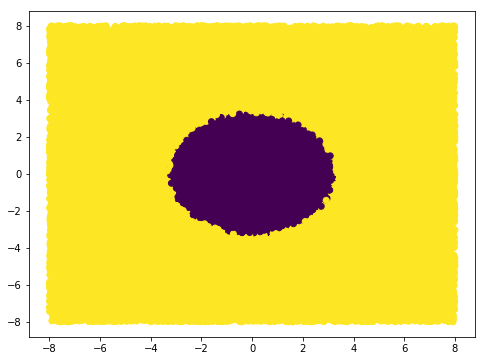

In [33]:
# Visualize the Learned Decision Boundary

X_vis = np.random.uniform(-8, 8, (int(10*X.shape[0]),X.shape[1]))

PHI_vis = np.vstack((np.ones(len(X_vis)), X_vis[:,0]**2, X_vis[:,1]**2)).T

p_vis = sigmoid(PHI_vis.dot(w))

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,0],X_vis[:,1], c = np.round(p_vis))